In [10]:
import numpy as np

def unit_step(v):
    """Unit step activation function"""
    return 1 if v >= 0 else 0

def perceptron_model(x, w, b):
    """Single-layer perceptron model"""
    v = np.dot(w, x) + b
    return unit_step(v)

def NOT_logic(x):
    """NOT logic gate using a perceptron"""
    w, b = -1, 0.5
    return perceptron_model(x, w, b)

def AND_logic(x):
    """AND logic gate using a perceptron"""
    w = np.array([1, 1])
    b = -1.5
    return perceptron_model(x, w, b)

def OR_logic(x):
    """OR logic gate using a perceptron"""
    w = np.array([1, 1])
    b = -0.5
    return perceptron_model(x, w, b)

def XOR_logic(x):
    """
    XOR logic gate using a combination of AND, OR, and NOT gates.
    XOR is implemented as:
    XOR(x1, x2) = AND(OR(x1, x2), NOT(AND(x1, x2)))
    """
    or_result = OR_logic(x)
    and_result = AND_logic(x)
    not_and_result = NOT_logic(and_result)
    final_input = np.array([or_result, not_and_result])
    return AND_logic(final_input)

# Test cases
test_cases = [np.array([0, 1]), np.array([1, 1]), np.array([0, 0]), np.array([1, 0])]

# Print results
for x in test_cases:
    print(f"XOR ({x[0]},{x[1]}) = {XOR_logic(x)}")


XOR (0,1) = 1
XOR (1,1) = 0
XOR (0,0) = 0
XOR (1,0) = 1



Training with SGD Optimizer:
Epoch 1/20 - SGD Loss: 1.0798
Epoch 2/20 - SGD Loss: 1.0459
Epoch 3/20 - SGD Loss: 1.0371
Epoch 4/20 - SGD Loss: 1.0322
Epoch 5/20 - SGD Loss: 1.0288
Epoch 6/20 - SGD Loss: 1.0238
Epoch 7/20 - SGD Loss: 1.0197
Epoch 8/20 - SGD Loss: 1.0163
Epoch 9/20 - SGD Loss: 1.0132
Epoch 10/20 - SGD Loss: 1.0096
Epoch 11/20 - SGD Loss: 1.0087
Epoch 12/20 - SGD Loss: 1.0041
Epoch 13/20 - SGD Loss: 1.0023
Epoch 14/20 - SGD Loss: 0.9996
Epoch 15/20 - SGD Loss: 0.9955
Epoch 16/20 - SGD Loss: 0.9937
Epoch 17/20 - SGD Loss: 0.9892
Epoch 18/20 - SGD Loss: 0.9859
Epoch 19/20 - SGD Loss: 0.9844
Epoch 20/20 - SGD Loss: 0.9809

Training with Adam Optimizer:
Epoch 1/20 - Adam Loss: 1.0477
Epoch 2/20 - Adam Loss: 1.0250
Epoch 3/20 - Adam Loss: 1.0176
Epoch 4/20 - Adam Loss: 1.0108
Epoch 5/20 - Adam Loss: 1.0049
Epoch 6/20 - Adam Loss: 0.9974
Epoch 7/20 - Adam Loss: 0.9881
Epoch 8/20 - Adam Loss: 0.9786
Epoch 9/20 - Adam Loss: 0.9687
Epoch 10/20 - Adam Loss: 0.9610
Epoch 11/20 - Ada

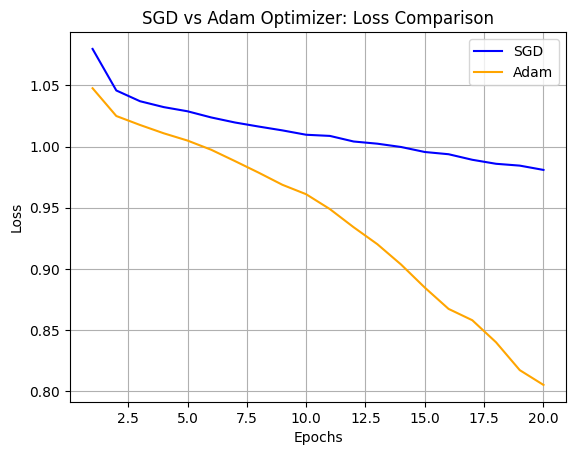

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
import numpy as np
import matplotlib.pyplot as plt

def create_data():
    X = np.random.randn(1000, 10)
    y = np.random.randn(1000, 1)
    return X, y

def create_model():
    model = models.Sequential([
        layers.Dense(50, activation='relu', input_shape=(10,)),
        layers.Dense(30, activation='relu'),  # Added hidden layer
        layers.Dense(20, activation='relu'),
        layers.Dense(10, activation='relu'),  # Added hidden layer
        layers.Dense(1)
    ])
    return model

def train_model(model, optimizer, X, y, batch_size, epochs, optimizer_name):
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    history = []

    for epoch in range(epochs):
        hist = model.fit(X, y, batch_size=batch_size, epochs=1, verbose=0)
        loss = hist.history['loss'][0]
        history.append(loss)
        print(f"Epoch {epoch+1}/{epochs} - {optimizer_name} Loss: {loss:.4f}")
    return history

X, y = create_data()

model_sgd = create_model()
model_adam = create_model()

optimizer_sgd = optimizers.SGD(learning_rate=0.01)
optimizer_adam = optimizers.Adam(learning_rate=0.001)

epochs = 20  # Reduced epoch count
batch_size = 32

print("\nTraining with SGD Optimizer:")
sgd_loss = train_model(model_sgd, optimizer_sgd, X, y, batch_size, epochs, 'SGD')

print("\nTraining with Adam Optimizer:")
adam_loss = train_model(model_adam, optimizer_adam, X, y, batch_size, epochs, 'Adam')

plt.plot(range(1, epochs+1), sgd_loss, label='SGD', color='blue')
plt.plot(range(1, epochs+1), adam_loss, label='Adam', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('SGD vs Adam Optimizer: Loss Comparison')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 34ms/step - accuracy: 0.8937 - loss: 0.3379 - val_accuracy: 0.9810 - val_loss: 0.0571
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 35ms/step - accuracy: 0.9841 - loss: 0.0517 - val_accuracy: 0.9805 - val_loss: 0.0603
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 34ms/step - accuracy: 0.9876 - loss: 0.0377 - val_accuracy: 0.9891 - val_loss: 0.0362
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 33ms/step - accuracy: 0.9907 - loss: 0.0288 - val_accuracy: 0.9880 - val_loss: 0.0372
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 34ms/step - accuracy: 0.9936 - loss: 0.0211 - val_accuracy: 0.9901 - val_loss: 0.0301
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9880 - loss: 0.0377
Test Accuracy: 0.9901000261306763


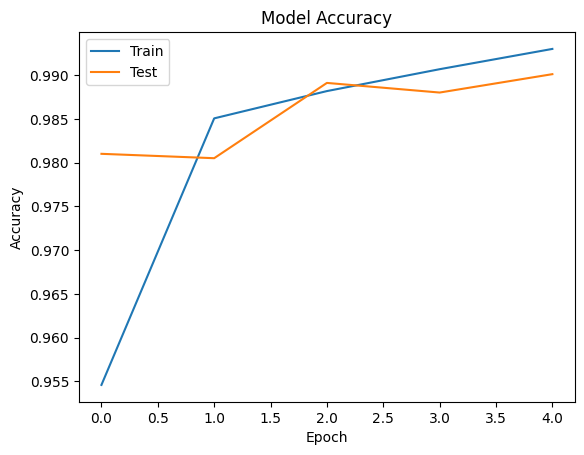

Test Loss: 0.03009789064526558


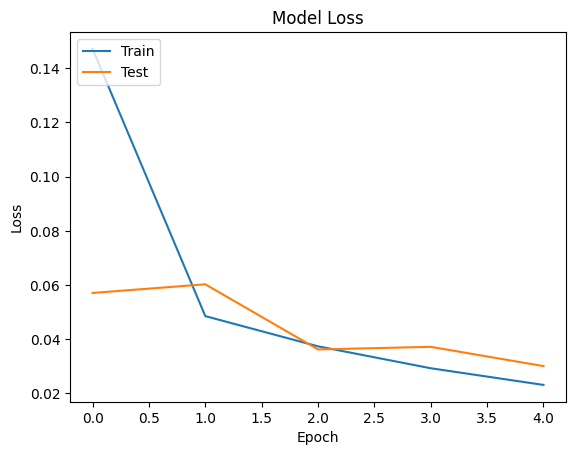

In [9]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_imgs, train_labels), (test_imgs, test_labels) = datasets.mnist.load_data()
train_imgs = train_imgs.reshape((train_imgs.shape[0], 28, 28, 1)).astype('float32') / 255
test_imgs = test_imgs.reshape((test_imgs.shape[0], 28, 28, 1)).astype('float32') / 255

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (1, 1), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

hist = model.fit(train_imgs, train_labels, epochs=5, validation_data=(test_imgs, test_labels))

test_loss, test_acc = model.evaluate(test_imgs, test_labels)
print(f'Test Accuracy: {test_acc}')

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

print(f'Test Loss: {test_loss}')

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
